# Overview

This notebook presents several classifiers aiming to predict startups success (aquired or failed, no IPO data in the imput dataset) based on the avaliable data.
 For the input data analysis, please view EDA notebood in the same repository.
 The dataset can be found here: https://www.kaggle.com/datasets/manishkc06/startup-success-prediction/data

 # Take code from git

In [1]:
!git clone https://github.com/MayaVB/Applied_DS_Project.git

Cloning into 'Applied_DS_Project'...


In [2]:
!ls Applied_DS_Project

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!ls Applied_DS_Project/src

'ls' is not recognized as an internal or external command,
operable program or batch file.


# Install requirements

In [4]:
!pip install -r Applied_DS_Project/requirements.txt

In [5]:
# consider for future features
# %pip install yfinance
# %pip install tweepy
# %pip install wbdata pandas
# %pip install xgboost

# Imports

In [1]:
# set working directory:
%cd Applied_DS_Project/src

# imports
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import sys
sys.path.append('../src')
from eval import plot_feature_importances, plot_auc_roc_curve, perform_cross_validation
from getdata import add_nasdaq_annual_changes, add_economic_indicators
from models import train_xgb_model, train_rf_model, train_svm_model
from models import train_rfv2_model
from models import evaluate_model, predict_model
from printstatistics import print_correlations_Spearman_and_Pearson
from preprocess import load_data, preprocess_data

import pandas as pd 
from scipy.stats import mode
import numpy as np

C:\Users\oralo\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


c:\Users\oralo\OneDrive\Documents\BIU 2024\Introduction to Data Science\Applied_DS_Project\src


In [2]:
def set_seed(random_seed):
    np.random.seed(random_seed)  # Set seed for NumPy operations to ensure reproducibility
    #random.seed(random_seed)
    #os.environ['TF_DETERMINISTIC_OPS'] = '1' # Ensure deterministic operations

# Load Data

In [3]:
df = load_data('../data/startup_data.csv')

# Convert the date column to datetime
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'])

# Extract year, month, and day into separate columns
df['first_funding_at_year'] = df['first_funding_at'].dt.year
df['first_funding_at_month'] = df['first_funding_at'].dt.month
df['first_funding_at_day'] = df['first_funding_at'].dt.day


# Convert the date column to datetime
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'])

# Extract year, month, and day into separate columns
df['first_funding_at_year'] = df['last_funding_at'].dt.year
df['first_funding_at_month'] = df['last_funding_at'].dt.month
df['first_funding_at_day'] = df['last_funding_at'].dt.day


df = df.drop(columns=['first_funding_at', 'last_funding_at', 'state_code.1'])
#in this dataset state_code is safe to drop as the vast majority of the starttups in this dataset are in locations with high VC activity

In [9]:
# # Create label
# df['status_code'] = df['status'].map({'acquired': 1, 'closed': 0})

# print_correlations_Spearman_and_Pearson(df['relationships'], df['status_code'])
# print_correlations_Spearman_and_Pearson(df['avg_participants'], df['status_code'])
# print_correlations_Spearman_and_Pearson(df['has_roundC'], df['status_code'])
# print_correlations_Spearman_and_Pearson(df['has_roundD'], df['status_code'])

# print_correlations_Spearman_and_Pearson(df['relationships'], df['status_code'])
# print_correlations_Spearman_and_Pearson(df['avg_participants'], df['status_code'])
# print_correlations_Spearman_and_Pearson(df['has_roundC'], df['status_code'])
# print_correlations_Spearman_and_Pearson(df['has_roundD'], df['status_code'])

# df.drop(columns=['status_code'])

# Preprocess Data

In [4]:
# Add economic indicators
df = add_nasdaq_annual_changes(df)
indicator_code = 'NY.GDP.MKTP.KD.ZG'
df = add_economic_indicators(df, indicator_code)
indicator_code = 'SL.UEM.TOTL.ZS'
df = add_economic_indicators(df, indicator_code)

# Preprocess the data
X, y = preprocess_data(df, useKNNImputer=True)

random_state = 42
set_seed(random_state)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

[*********************100%%**********************]  1 of 1 completed


# Train predict and evaluate classifiers

## XG Boost

c:\Users\oralo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:22:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Threshold: 0.5
AUC-ROC: 0.79
Accuracy: 0.76
Balanced Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.59      0.66        73
           1       0.76      0.87      0.81       112

    accuracy                           0.76       185
   macro avg       0.75      0.73      0.73       185
weighted avg       0.75      0.76      0.75       185

Confusion Matrix (Test):
[[43 30]
 [15 97]]


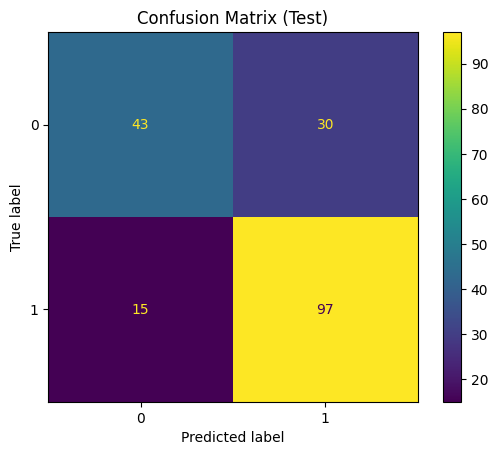

Precision (Test): 0.7638
Recall (Test): 0.8661


c:\Users\oralo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:22:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\oralo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:22:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\oralo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:22:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

Cross-Validation Accuracy Scores: [0.79054054 0.79054054 0.74324324 0.7755102  0.76190476]
Mean Cross-Validation Accuracy: 0.77
Cross-Validation Balanced Accuracy Scores: [0.73792197 0.7565191  0.68324237 0.72329897 0.72268041]
Mean Cross-Validation Balanced Accuracy: 0.72
Cross-Validation AUC Scores: [0.80129371 0.81645442 0.80877299 0.83958763 0.83257732]
Mean Cross-Validation AUC: 0.82
Cross-Validation Precision Scores: [0.8        0.82352941 0.76576577 0.7962963  0.80392157]
Mean Cross-Validation Precision: 0.8
Cross-Validation Recall Scores: [0.90721649 0.86597938 0.87628866 0.88659794 0.84536082]
Mean Cross-Validation Recall: 0.88
Cross-Validation F1 Scores: [0.85024155 0.84422111 0.81730769 0.83902439 0.8241206 ]
Mean Cross-Validation F1: 0.83
Cross-Validation Kappa Scores: [0.50645439 0.52524834 0.392      0.47174126 0.45641838]
Mean Cross-Validation Kappa: 0.47


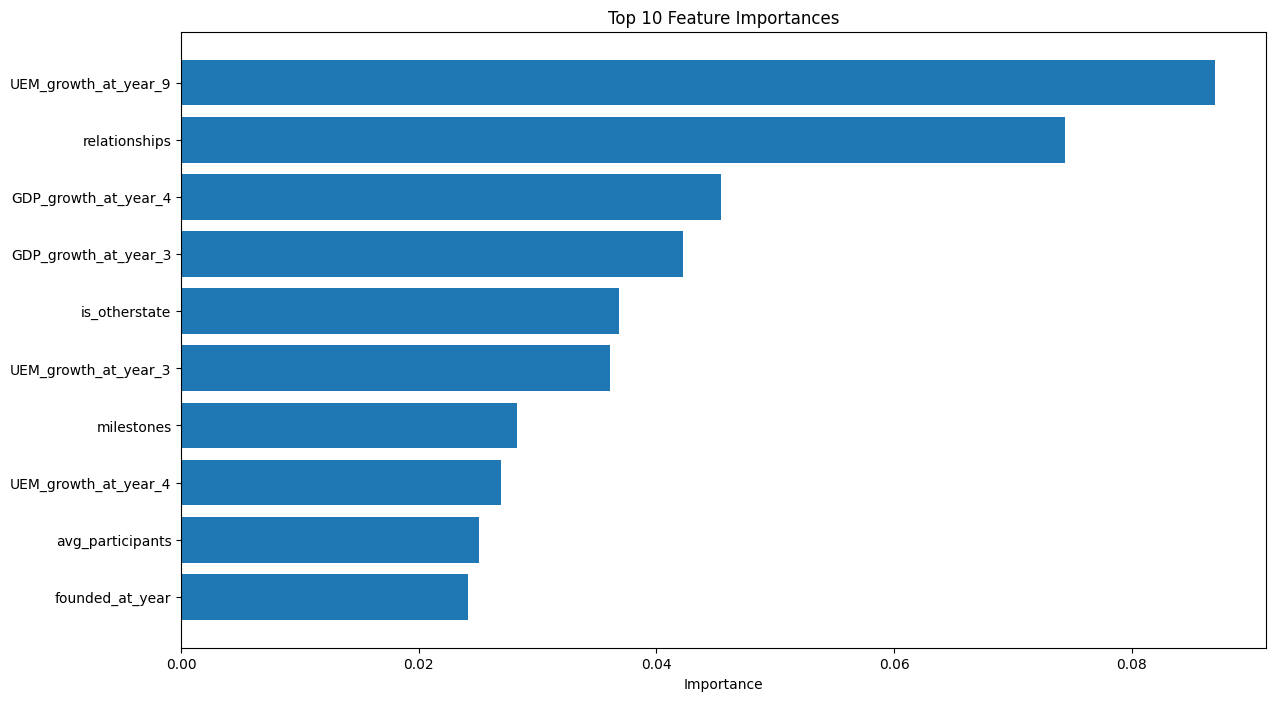

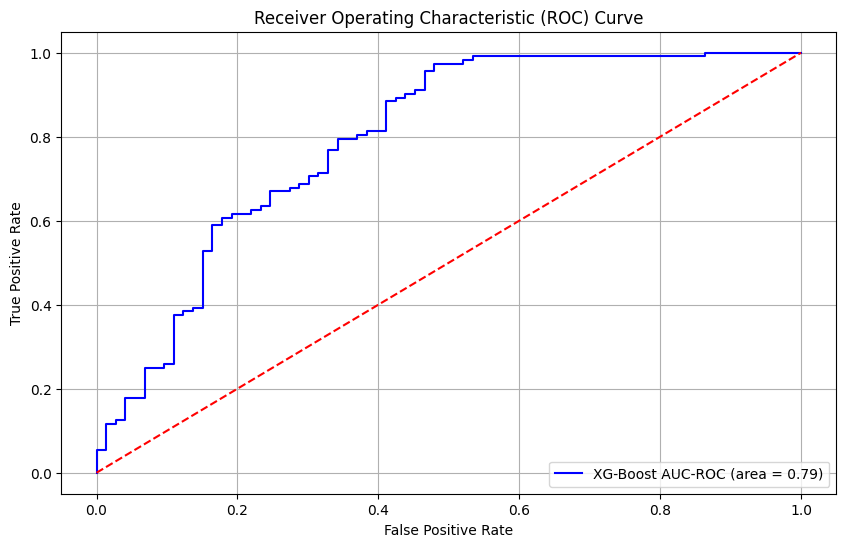

In [5]:
xgb_clf = train_xgb_model(X_train, y_train)
xgb_pred, xgb_prob = predict_model(xgb_clf, X_test)
evaluate_model(y_test, xgb_pred, xgb_prob, threshold=0.5)
cv_results_xgb = perform_cross_validation(xgb_clf, X_train, y_train, n_splits=5, random_state=random_state)

plot_feature_importances(xgb_clf, feature_names=X.columns, num_of_features=10)
plot_auc_roc_curve(y_test, xgb_prob, model_name='XG-Boost')

## Random Forest Ver2

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Threshold: 0.7
AUC-ROC: 0.84
Accuracy: 0.79
Balanced Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        73
           1       0.81      0.86      0.83       112

    accuracy                           0.79       185
   macro avg       0.79      0.78      0.78       185
weighted avg       0.79      0.79      0.79       185

Confusion Matrix (Test):
[[51 22]
 [16 96]]


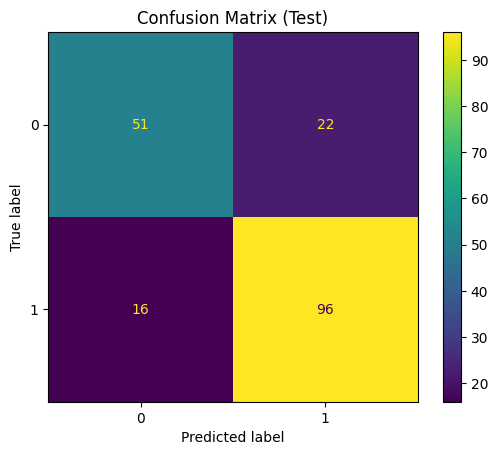

Precision (Test): 0.8136
Recall (Test): 0.8571
Cross-Validation Accuracy Scores: [0.79054054 0.73648649 0.75675676 0.82993197 0.78231293]
Mean Cross-Validation Accuracy: 0.78
Cross-Validation Balanced Accuracy Scores: [0.74722054 0.70598342 0.71214878 0.80329897 0.74783505]
Mean Cross-Validation Balanced Accuracy: 0.74
Cross-Validation AUC Scores: [0.81867799 0.79543157 0.81807156 0.8614433  0.8428866 ]
Mean Cross-Validation AUC: 0.83
Cross-Validation Precision Scores: [0.81132075 0.79591837 0.79047619 0.86       0.82178218]
Mean Cross-Validation Precision: 0.82
Cross-Validation Recall Scores: [0.88659794 0.80412371 0.8556701  0.88659794 0.8556701 ]
Mean Cross-Validation Recall: 0.86
Cross-Validation F1 Scores: [0.84729064 0.8        0.82178218 0.87309645 0.83838384]
Mean Cross-Validation F1: 0.84
Cross-Validation Kappa Scores: [0.51603376 0.41389115 0.44068864 0.61554556 0.50546678]
Mean Cross-Validation Kappa: 0.5


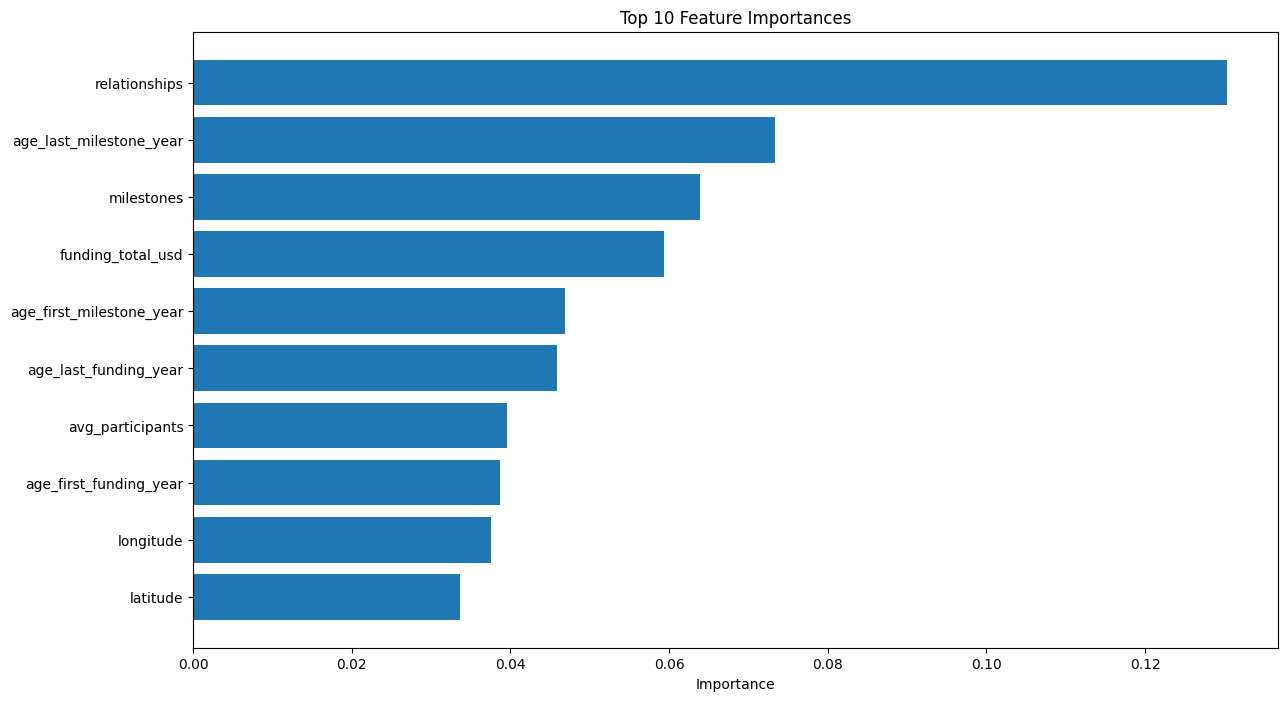

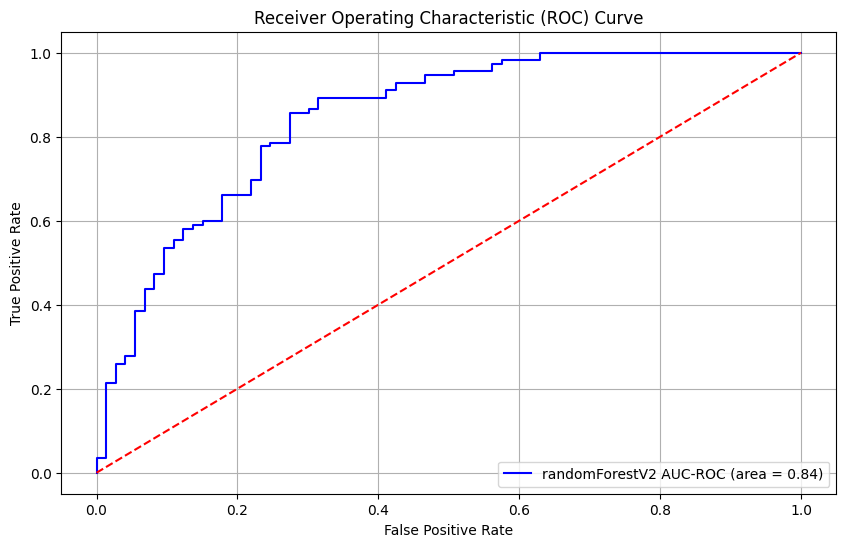

In [6]:
rfv2_clf = train_rfv2_model(X_train, y_train)
rfv2_pred, rfv2_prob = predict_model(rfv2_clf, X_test)
evaluate_model(y_test, rfv2_pred, rfv2_prob)
cv_results_rfv2 = perform_cross_validation(rfv2_clf, X_train, y_train, n_splits=5, random_state=random_state)

plot_feature_importances(rfv2_clf, feature_names=X.columns, num_of_features=10)
plot_auc_roc_curve(y_test, rfv2_prob, model_name='randomForestV2')

## Fandom Forest

Threshold: 0.7
AUC-ROC: 0.83
Accuracy: 0.78
Balanced Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.59      0.68        73
           1       0.77      0.90      0.83       112

    accuracy                           0.78       185
   macro avg       0.78      0.75      0.75       185
weighted avg       0.78      0.78      0.77       185

Confusion Matrix (Test):
[[ 43  30]
 [ 11 101]]


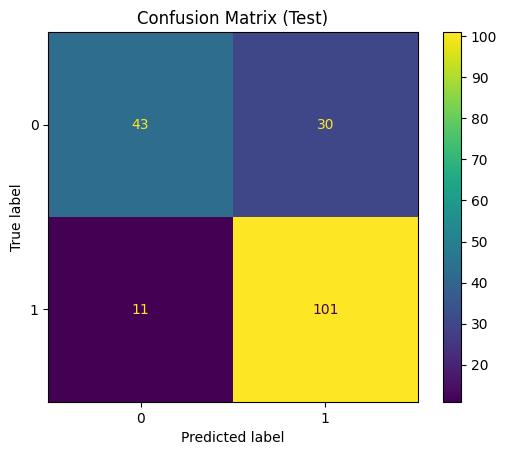

Precision (Test): 0.771
Recall (Test): 0.9018
Cross-Validation Accuracy Scores: [0.77702703 0.75675676 0.77027027 0.82993197 0.84353741]
Mean Cross-Validation Accuracy: 0.8
Cross-Validation Balanced Accuracy Scores: [0.70436628 0.70285021 0.71315949 0.78876289 0.78938144]
Mean Cross-Validation Balanced Accuracy: 0.74
Cross-Validation AUC Scores: [0.80604407 0.80018193 0.81594906 0.87979381 0.84412371]
Mean Cross-Validation AUC: 0.83
Cross-Validation Precision Scores: [0.77118644 0.77981651 0.78378378 0.83962264 0.83035714]
Mean Cross-Validation Precision: 0.8
Cross-Validation Recall Scores: [0.93814433 0.87628866 0.89690722 0.91752577 0.95876289]
Mean Cross-Validation Recall: 0.92
Cross-Validation F1 Scores: [0.84651163 0.82524272 0.83653846 0.87684729 0.88995215]
Mean Cross-Validation F1: 0.86
Cross-Validation Kappa Scores: [0.45295699 0.42967245 0.456      0.60385901 0.62412451]
Mean Cross-Validation Kappa: 0.51


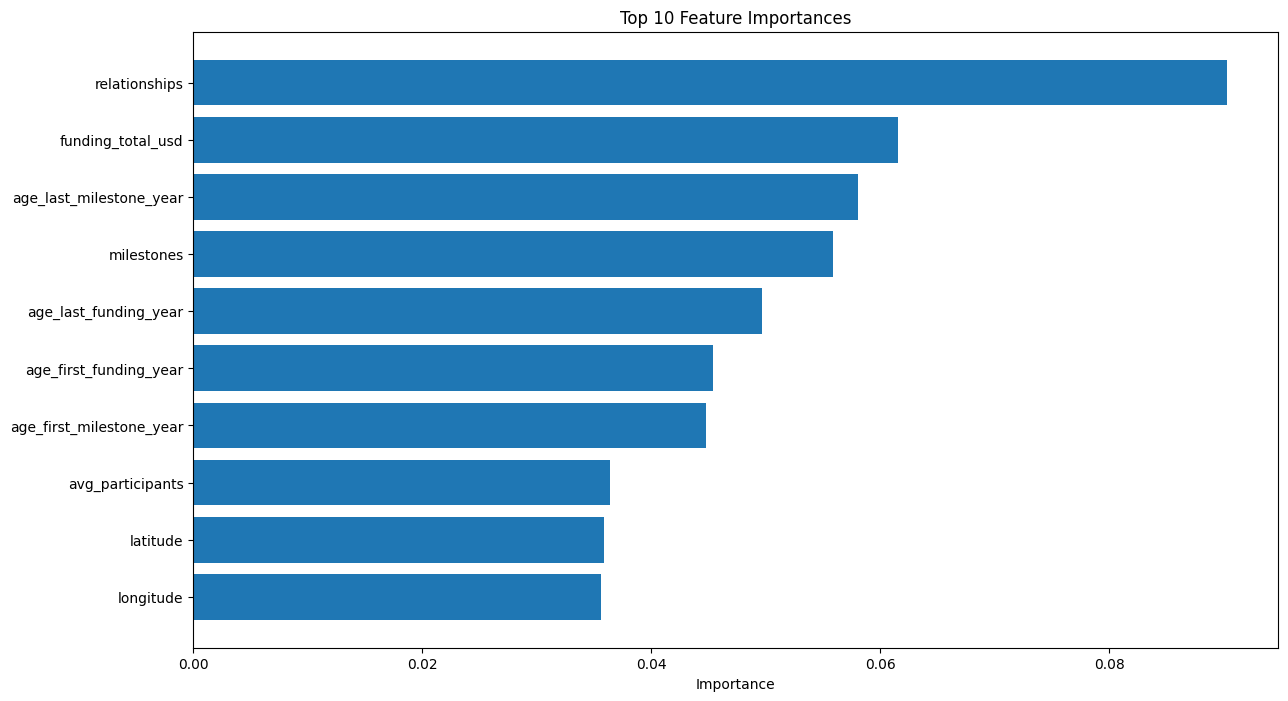

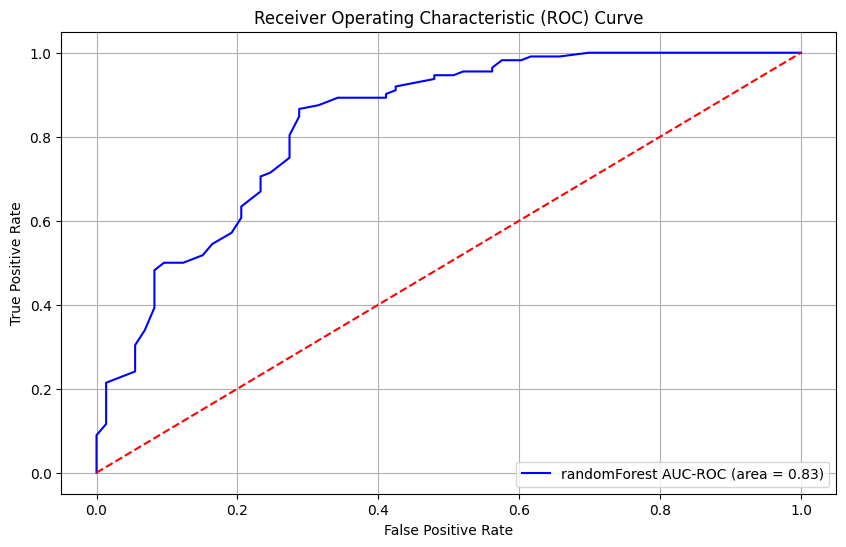

In [7]:
rf_clf = train_rf_model(X_train, y_train)
rf_pred, rf_prob = predict_model(rf_clf, X_test)
evaluate_model(y_test, rf_pred, rf_prob)
cv_results_rf = perform_cross_validation(rf_clf, X_train, y_train, n_splits=5, random_state=random_state)

plot_feature_importances(rf_clf, feature_names=X.columns, num_of_features=10)
plot_auc_roc_curve(y_test, rf_prob, model_name='randomForest')

## SVM

Threshold: 0.7
AUC-ROC: 0.81
Accuracy: 0.75
Balanced Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.53      0.63        73
           1       0.75      0.89      0.81       112

    accuracy                           0.75       185
   macro avg       0.76      0.71      0.72       185
weighted avg       0.75      0.75      0.74       185

Confusion Matrix (Test):
[[ 39  34]
 [ 12 100]]


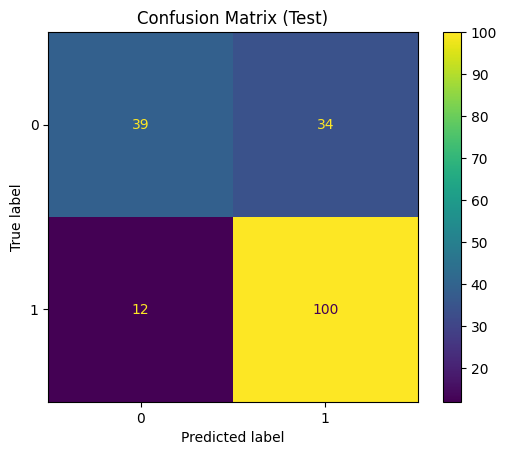

Precision (Test): 0.7463
Recall (Test): 0.8929
Cross-Validation Accuracy Scores: [0.77027027 0.71621622 0.77027027 0.78911565 0.76190476]
Mean Cross-Validation Accuracy: 0.76
Cross-Validation Balanced Accuracy Scores: [0.69456236 0.64402668 0.70386093 0.72876289 0.70329897]
Mean Cross-Validation Balanced Accuracy: 0.69
Cross-Validation AUC Scores: [0.75116232 0.73236305 0.79421872 0.81257732 0.82061856]
Mean Cross-Validation AUC: 0.78
Cross-Validation Precision Scores: [0.76470588 0.73913043 0.77391304 0.79464286 0.78181818]
Mean Cross-Validation Precision: 0.77
Cross-Validation Recall Scores: [0.93814433 0.87628866 0.91752577 0.91752577 0.88659794]
Mean Cross-Validation Recall: 0.91
Cross-Validation F1 Scores: [0.84259259 0.80188679 0.83962264 0.85167464 0.83091787]
Mean Cross-Validation F1: 0.83
Cross-Validation Kappa Scores: [0.43346093 0.31436135 0.44495919 0.49338521 0.43393113]
Mean Cross-Validation Kappa: 0.42


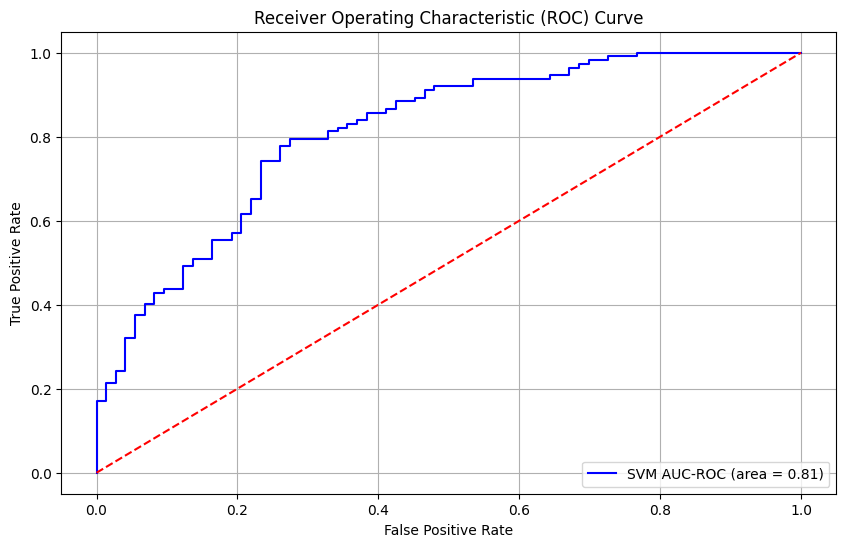

In [8]:
svm_clf = train_svm_model(X_train, y_train)
svm_pred, svm_prob = predict_model(svm_clf, X_test)
evaluate_model(y_test, svm_pred, svm_prob)
cv_results_SVM = perform_cross_validation(svm_clf, X_train, y_train, n_splits=5, random_state=42)

plot_auc_roc_curve(y_test, svm_prob, model_name='SVM')

# Ensemble classifiers

## Ensemble all

Threshold: 0.5
AUC-ROC: 0.84
Accuracy: 0.77
Balanced Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.64      0.69        73
           1       0.79      0.85      0.82       112

    accuracy                           0.77       185
   macro avg       0.76      0.75      0.75       185
weighted avg       0.77      0.77      0.76       185

Confusion Matrix (Test):
[[47 26]
 [17 95]]


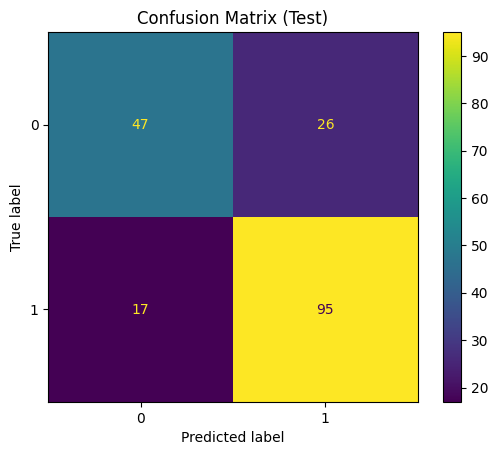

Precision (Test): 0.7851
Recall (Test): 0.8482


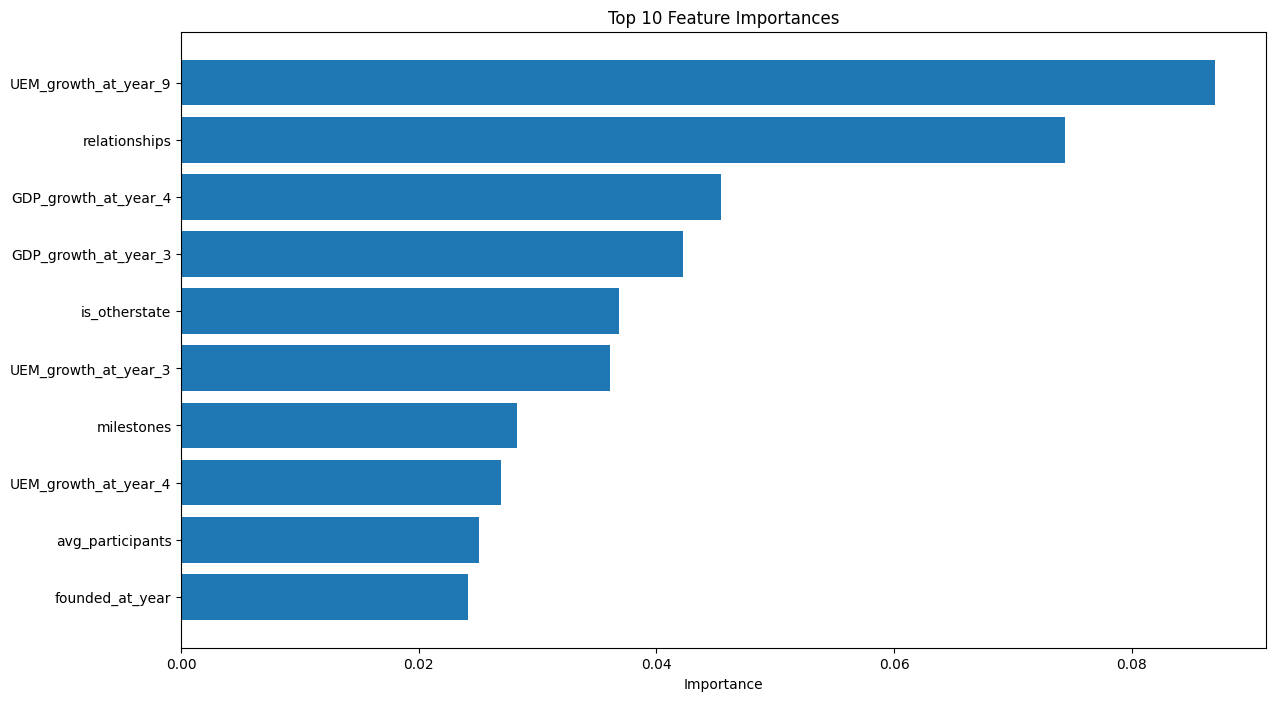

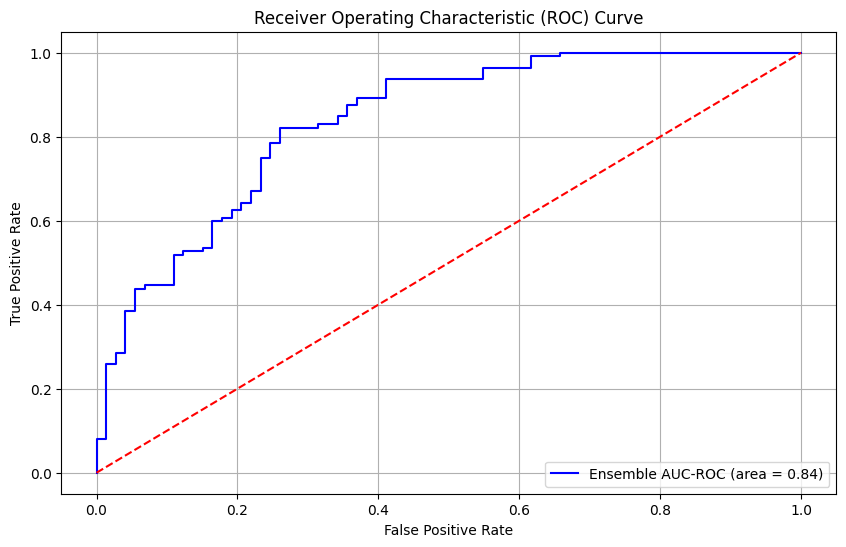

In [9]:
# Combine predictions using majority voting

# Stack the predictions into a matrix
predictions = np.vstack((xgb_pred, rfv2_pred, rf_pred, svm_pred)).T

# Majority voting
ensemble_pred, _ = mode(predictions, axis=1)
ensemble_pred = ensemble_pred.ravel()

# Combine probabilities (e.g., by averaging them)
ensemble_prob = (xgb_prob + rfv2_prob + rf_prob + svm_prob) / 4

# Evaluate the ensemble model
evaluate_model(y_test, ensemble_pred, ensemble_prob, threshold=0.5)

# Plot feature importances and AUC-ROC curves
plot_feature_importances(xgb_clf, feature_names=X.columns, num_of_features=10)
plot_auc_roc_curve(y_test, ensemble_prob, model_name='Ensemble')

## Ensemble with SVM

Threshold: 0.5
AUC-ROC: 0.84
Accuracy: 0.78
Balanced Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.63      0.69        73
           1       0.78      0.88      0.83       112

    accuracy                           0.78       185
   macro avg       0.78      0.75      0.76       185
weighted avg       0.78      0.78      0.77       185

Confusion Matrix (Test):
[[46 27]
 [14 98]]


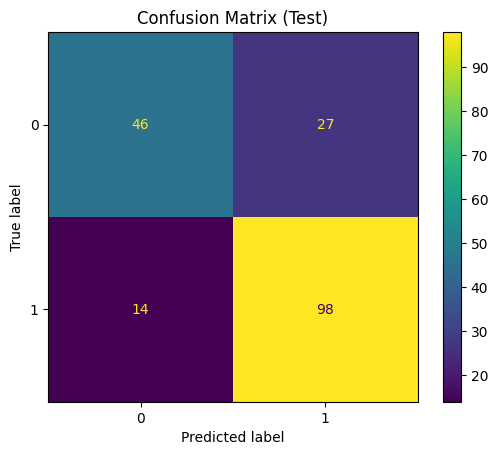

Precision (Test): 0.784
Recall (Test): 0.875


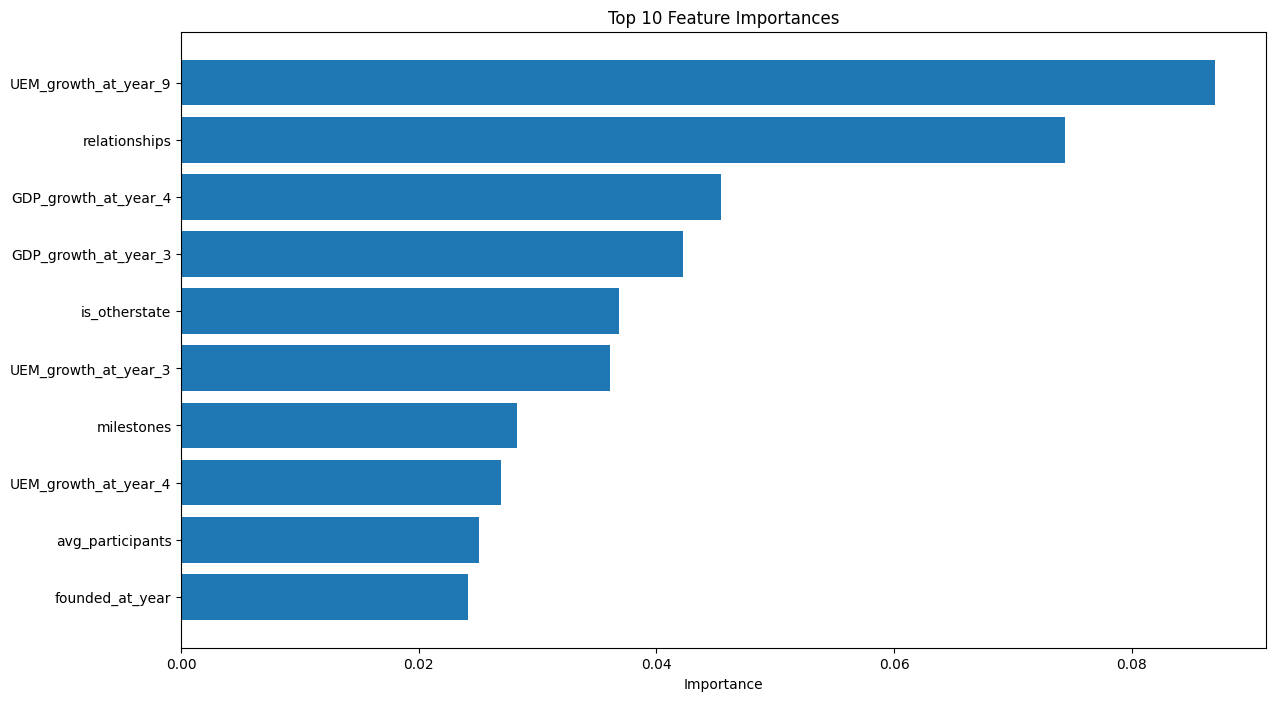

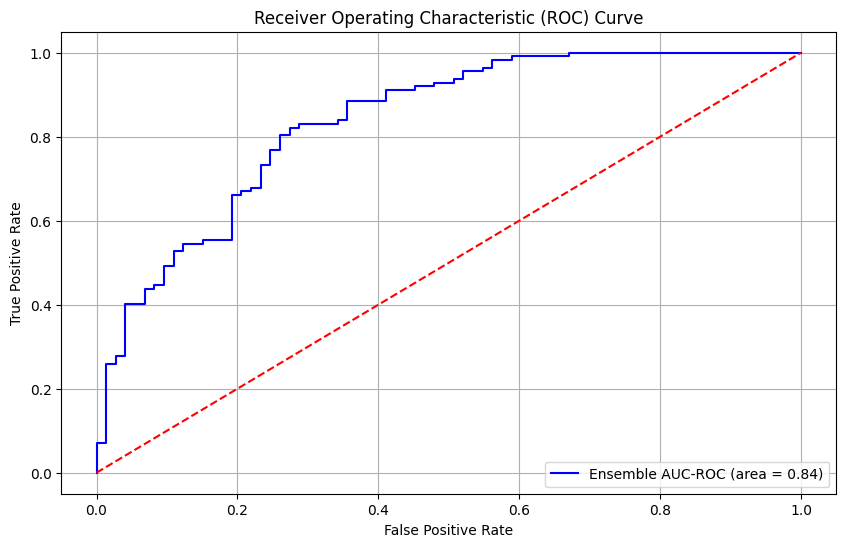

In [10]:
# Combine predictions using majority voting

# Stack the predictions into a matrix
predictions = np.vstack((xgb_pred, rfv2_pred, svm_pred)).T

# Majority voting
ensemble_pred, _ = mode(predictions, axis=1)
ensemble_pred = ensemble_pred.ravel()

# Combine probabilities (e.g., by averaging them)
ensemble_prob = (xgb_prob + rfv2_prob + svm_prob) / 3

# Evaluate the ensemble model
evaluate_model(y_test, ensemble_pred, ensemble_prob, threshold=0.5)

# Plot feature importances and AUC-ROC curves
plot_feature_importances(xgb_clf, feature_names=X.columns, num_of_features=10)
plot_auc_roc_curve(y_test, ensemble_prob, model_name='Ensemble')

## Ensemble without SVM

Threshold: 0.5
AUC-ROC: 0.84
Accuracy: 0.78
Balanced Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.62      0.69        73
           1       0.78      0.88      0.83       112

    accuracy                           0.78       185
   macro avg       0.78      0.75      0.76       185
weighted avg       0.78      0.78      0.77       185

Confusion Matrix (Test):
[[45 28]
 [13 99]]


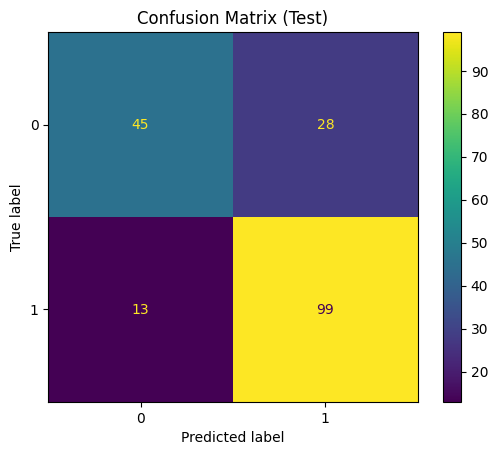

Precision (Test): 0.7795
Recall (Test): 0.8839


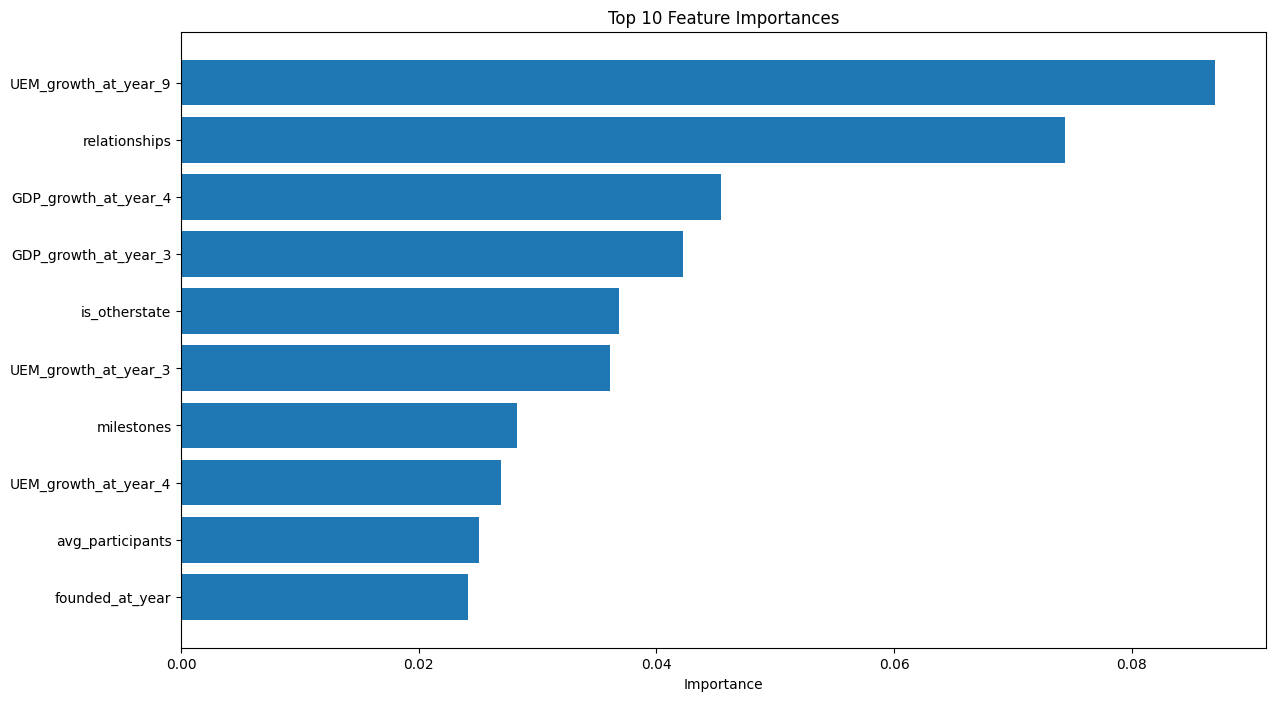

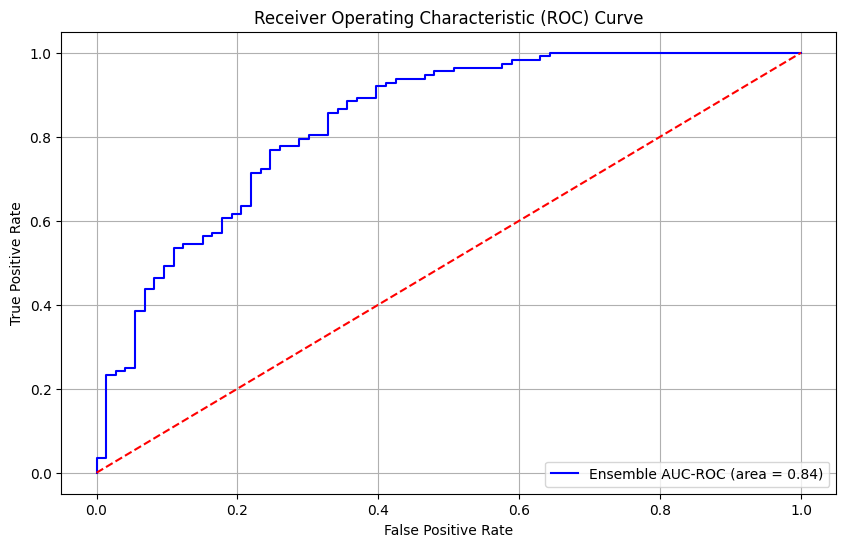

In [60]:
# Combine predictions using majority voting

# Stack the predictions into a matrix
predictions = np.vstack((xgb_pred, rfv2_pred, rf_pred)).T

# Majority voting
ensemble_pred, _ = mode(predictions, axis=1)
ensemble_pred = ensemble_pred.ravel()

# Combine probabilities (e.g., by averaging them)
ensemble_prob = (xgb_prob + rfv2_prob + rf_prob) / 3

# Evaluate the ensemble model
evaluate_model(y_test, ensemble_pred, ensemble_prob, threshold=0.5)

# Plot feature importances and AUC-ROC curves
plot_feature_importances(xgb_clf, feature_names=X.columns, num_of_features=10)
plot_auc_roc_curve(y_test, ensemble_prob, model_name='Ensemble')

# Analyse results

## Combine with the original features

In [61]:
import pandas as pd

# Create DataFrame with all features, y_test, and predictions
result_df = pd.DataFrame(X_test, columns=X.columns)
result_df['Actual'] = y_test.values
'''
result_df['Predicted_xgb'] = xgb_pred
result_df['Probability_xgb'] = xgb_prob
result_df['Predicted_rfv2'] = rfv2_pred
result_df['Probability_rfv2'] = rfv2_prob
result_df['Predicted_rf'] = rf_pred
result_df['Probability_rf'] = rf_prob
result_df['Predicted_svm'] = svm_pred
result_df['Probability_svm'] = svm_prob
'''
result_df['Predicted_ensemble'] = ensemble_pred
result_df['Probability_ensemble'] = ensemble_prob

# Display the DataFrame
result_df.head()

,category_code_advertising,category_code_analytics,category_code_automotive,category_code_biotech,category_code_cleantech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_fashion,...,UEM_growth_at_year_4,UEM_growth_at_year_5,UEM_growth_at_year_6,UEM_growth_at_year_7,UEM_growth_at_year_8,UEM_growth_at_year_9,UEM_growth_at_year_10,Actual,Predicted_ensemble,Probability_ensemble
323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.035482,0.642984,1.165186,0.688725,-0.545468,-1.351670,-1.176347,1,1,0.956439
861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.265623,1.011685,-0.494116,-1.343311,-1.060625,-0.832721,-0.417653,1,1,0.597206
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.265623,1.011685,-0.494116,-1.343311,-1.060625,-0.832721,-0.417653,0,1,0.524228
837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.452522,2.633101,3.158196,1.842594,1.958874,1.456055,0.713492,0,0,0.091596
294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.969460,-0.515378,-1.468858,-1.085761,-0.766825,-0.343769,0.020467,0,0,0.314590


## try

In [62]:
df1 = load_data('../data/startup_data.csv')

In [63]:
df1.category_code.value_counts()

category_code
software            153
web                 144
mobile               79
enterprise           73
advertising          62
games_video          52
semiconductor        35
network_hosting      34
biotech              34
hardware             27
ecommerce            25
public_relations     25
cleantech            23
security             19
analytics            19
social               14
search               12
other                11
messaging            11
fashion               8
travel                8
news                  8
medical               7
photo_video           7
music                 6
finance               6
education             4
consulting            3
real_estate           3
health                3
automotive            2
manufacturing         2
transportation        2
hospitality           1
sports                1
Name: count, dtype: int64

In [81]:
result_df_ok = result_df[result_df['Predicted_ensemble'] == result_df['Actual']]
result_df_fail = result_df[result_df['Predicted_ensemble'] != result_df['Actual']]

print(result_df_ok['category_code_biotech'].value_counts() / len(result_df_ok))

category_code_biotech
0.0    0.965278
1.0    0.034722
Name: count, dtype: float64


In [94]:
# Correlation analysis for incorrect predictions, to see which features correlate with the errors, focusing on predicted values
incorrect_corr = abs(result_df_fail.corr())
print("Correlation in Incorrect Predictions with Predicted Values:\n", incorrect_corr['Predicted_ensemble'].sort_values(ascending=False).head(15))


Correlation in Incorrect Predictions with Predicted Values:
 Actual                       1.000000
Predicted_ensemble           1.000000
Probability_ensemble         0.769433
age_last_milestone_year      0.511204
age_first_milestone_year     0.446806
first_funding_at_day         0.425985
age_last_funding_year        0.406456
founded_at_month             0.373280
UEM_growth_at_year_10        0.339647
is_gamesvideo                0.332346
category_code_games_video    0.332346
has_roundB                   0.323115
avg_participants             0.307276
is_NY                        0.305898
founded_at_year              0.289687
Name: Predicted_ensemble, dtype: float64


In [104]:
# Add a new column 'predicted_correctly' to the DataFrame
result_df['predicted_correctly'] = (result_df['Predicted_ensemble'] == result_df['Actual']).astype(int)


                  Total  Correct  Incorrect  Accuracy
software           33.0     25.0        8.0  0.757576
web                24.0     19.0        5.0  0.791667
games_video        15.0     13.0        2.0  0.866667
mobile             15.0     12.0        3.0  0.800000
advertising        13.0     12.0        1.0  0.923077
enterprise         12.0     11.0        1.0  0.916667
network_hosting     9.0      5.0        4.0  0.555556
cleantech           8.0      5.0        3.0  0.625000
hardware            7.0      6.0        1.0  0.857143
analytics           6.0      4.0        2.0  0.666667
public_relations    5.0      3.0        2.0  0.600000
biotech             5.0      5.0        0.0  1.000000
search              4.0      2.0        2.0  0.500000
semiconductor       3.0      3.0        0.0  1.000000
security            3.0      3.0        0.0  1.000000
photo_video         3.0      1.0        2.0  0.333333
other               3.0      1.0        2.0  0.333333
messaging           3.0     

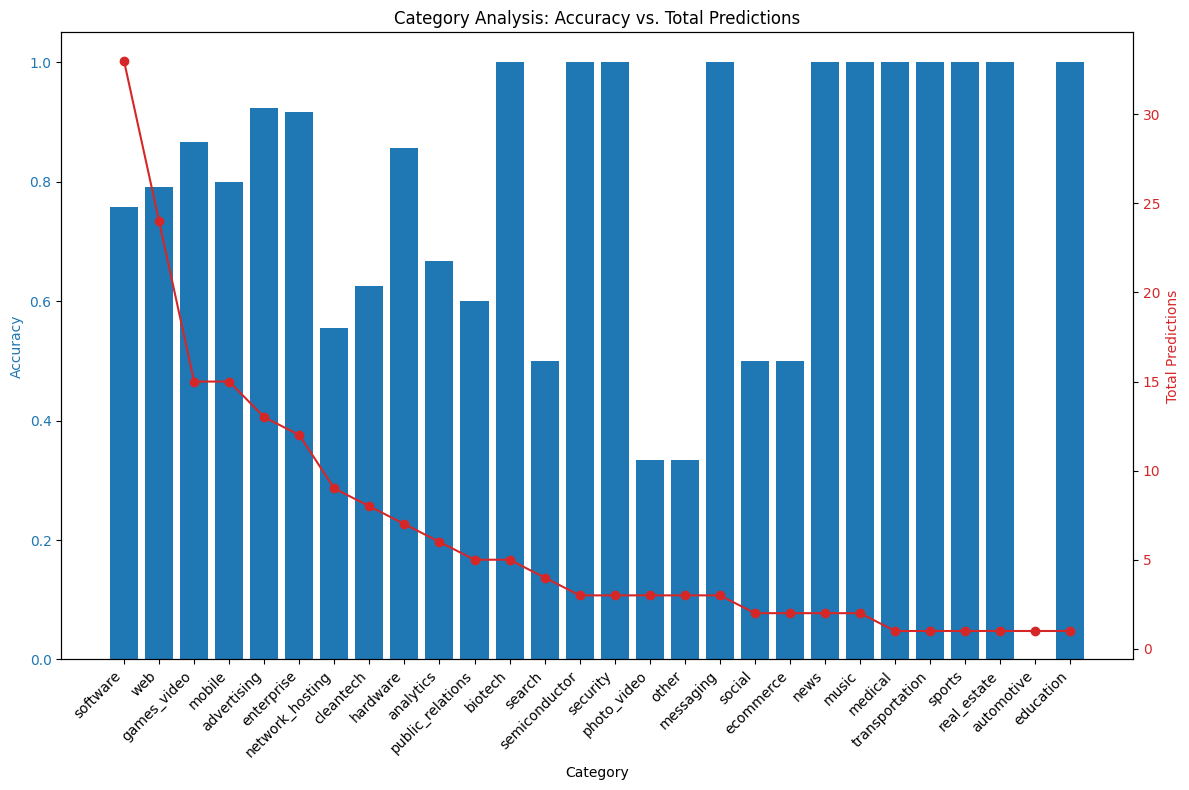

In [139]:
import matplotlib.pyplot as plt

# Calculate the total predictions for each category and the correct prediction rate
category_analysis = {}

for column in result_df.columns:
    if column.startswith('category_code_'):
        total = result_df[column].sum()  # total instances of this category
        correct = result_df[result_df['predicted_correctly'] == 1][column].sum()
        accuracy = correct / total if total > 0 else 0
        incorrect = total - correct
        category_name = column.replace('category_code_', '')
        category_analysis[category_name] = {'Total': total, 'Correct': correct, 'Incorrect': incorrect, 'Accuracy': accuracy}

# Convert to DataFrame for better visualization
category_df = pd.DataFrame.from_dict(category_analysis, orient='index')
category_df = category_df.sort_values(by='Total', ascending=False)

# Filter out categories with total prediction count of 0
category_df = category_df[category_df['Total'] > 0]

print(category_df)

# Plot the accuracy with quantitative information
fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:blue'
ax1.set_xlabel('Category')
ax1.set_ylabel('Accuracy', color=color)
ax1.bar(category_df.index, category_df['Accuracy'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=45, ha='right')  

# Create a second y-axis for the total counts
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Predictions', color=color)
ax2.plot(category_df.index, category_df['Total'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Category Analysis: Accuracy vs. Total Predictions')
fig.tight_layout()
plt.show()


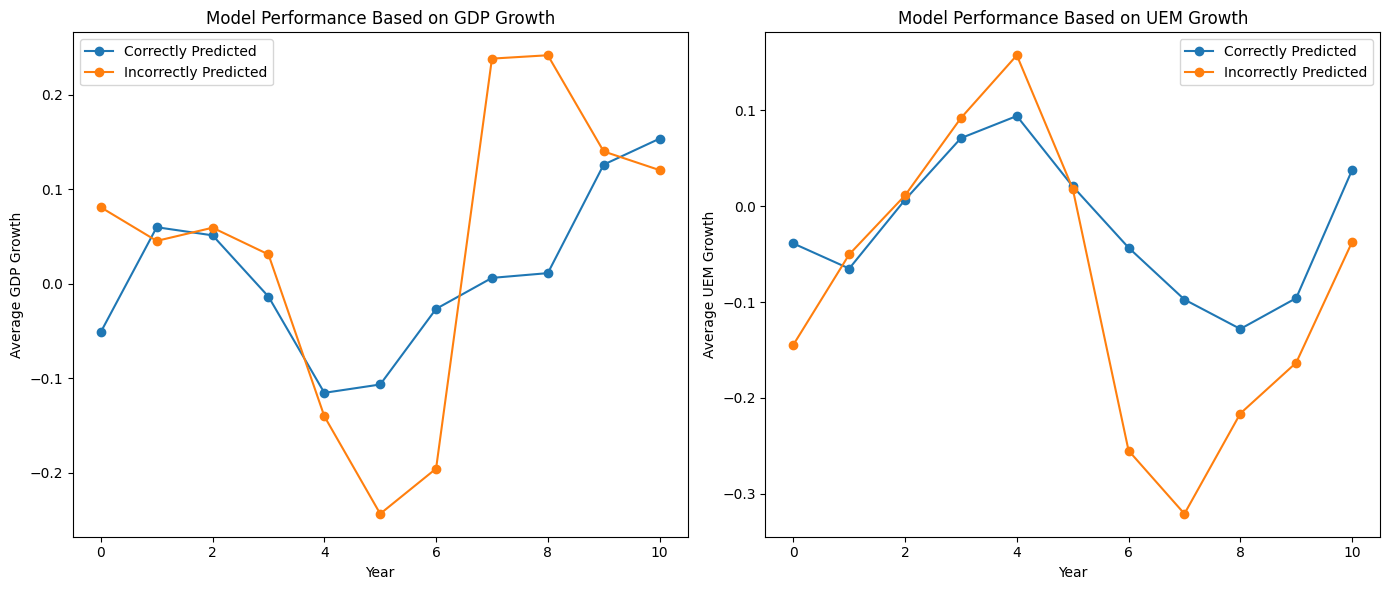

In [130]:
# Extract GDP and UEM columns
gdp_columns = [col for col in result_df.columns if 'GDP_growth_at_year' in col]
uem_columns = [col for col in result_df.columns if 'UEM_growth_at_year' in col]

# Calculate mean prediction correctness for each year
gdp_accuracy = result_df.groupby('predicted_correctly')[gdp_columns].mean().T
uem_accuracy = result_df.groupby('predicted_correctly')[uem_columns].mean().T

# Assign a vector of 0-10 to the 'Year' column
gdp_accuracy['Year'] = list(range(11))
uem_accuracy['Year'] = list(range(11))

# Plotting the results
plt.figure(figsize=(14, 6))

# GDP Growth plot
plt.subplot(1, 2, 1)
plt.plot(gdp_accuracy['Year'], gdp_accuracy[1], label='Correctly Predicted', marker='o')
plt.plot(gdp_accuracy['Year'], gdp_accuracy[0], label='Incorrectly Predicted', marker='o')
plt.xlabel('Year')
plt.ylabel('Average GDP Growth')
plt.title('Model Performance Based on GDP Growth')
plt.legend()

# UEM Growth plot
plt.subplot(1, 2, 2)
plt.plot(uem_accuracy['Year'], uem_accuracy[1], label='Correctly Predicted', marker='o')
plt.plot(uem_accuracy['Year'], uem_accuracy[0], label='Incorrectly Predicted', marker='o')
plt.xlabel('Year')
plt.ylabel('Average UEM Growth')
plt.title('Model Performance Based on UEM Growth')
plt.legend()

plt.tight_layout()
plt.show()


In [16]:
print(result_df_ok.category_code_biotech.value_counts())

category_code_biotech
0.0    139
1.0      5
Name: count, dtype: int64


In [17]:
result_df_fail.category_code_finance.value_counts()

category_code_finance
0.0    41
Name: count, dtype: int64

In [18]:
result_df_fail['category_code_biotech'] = result_df_fail.category_code_biotech.apply(lambda x: 1 if x > 0.6 else 0)
#print(result_df_fail['category_code_biotech'].value_counts() / len(result_df_fail))
print(result_df_fail['category_code_biotech'].value_counts() )

category_code_biotech
0    41
Name: count, dtype: int64


C:\Users\oralo\AppData\Local\Temp\ipykernel_89696\3361802483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df_fail['category_code_biotech'] = result_df_fail.category_code_biotech.apply(lambda x: 1 if x > 0.6 else 0)


In [19]:
result_df_fail['category_code_software'] = result_df_fail.category_code_software.apply(lambda x: 1 if x > 0.6 else 0)
#print(result_df_fail['category_code_software'].value_counts() / len(result_df_fail))
print(result_df_fail['category_code_software'].value_counts() )

category_code_software
0    33
1     8
Name: count, dtype: int64


C:\Users\oralo\AppData\Local\Temp\ipykernel_89696\3962302272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df_fail['category_code_software'] = result_df_fail.category_code_software.apply(lambda x: 1 if x > 0.6 else 0)


In [20]:
result_df_fail['is_othercategory'] = result_df_fail.is_othercategory.apply(lambda x: 1 if x > 0.6 else 0)
#print(result_df_fail['is_othercategory'].value_counts() / len(result_df_fail))
print(result_df_fail['is_othercategory'].value_counts() )

is_othercategory
0    21
1    20
Name: count, dtype: int64


C:\Users\oralo\AppData\Local\Temp\ipykernel_89696\2290815657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df_fail['is_othercategory'] = result_df_fail.is_othercategory.apply(lambda x: 1 if x > 0.6 else 0)


In [21]:
result_df.is_othercategory.value_counts()

is_othercategory
-0.690507    119
 1.448211     66
Name: count, dtype: int64